## Exploratory Data Analysis (EDA) Otomobil By Muhammad Arif Wicaksono

data from https://www.kaggle.com/fadhrigabestari/olxmobilbekas


### 1. Data Dictionary
1. Harga = harga Mobil
2. Lokasi = tempat Penjual
3. Penjual = nama penjual
4. Merek = Nama Merek Mobil
5. Model = Model Mobil
6. Varian = Varian mobil
7. Tahun = tahun mobil dibuat
8. Jarak tempuh = jarak tempuh mobil
9. Tipe Bahan Bakar = bahan bakar mobil
10. Warna = warna mobil
11. Transmisi = cara mengoprasikan mobil
12. Tipe bodi = bentuk mobil
13. Kapasitas mesin = cc
14. Tipe penjual
15. Sistem Penggerak = cara mobil berjalan
16. Nama Bursa Mobil


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

### 2. Read Data

In [3]:
data = pd.read_csv('mobilbekas.csv')

In [4]:
data.head()

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
0,155000792,"Ngaliyan, Semarang Kota, Jawa Tengah",Tegar Ranisdya,BMW,Serie 3,320i Business Edition,2006,85.000-90.000 km,Bensin,Hitam,Automatic,Sedan,>1.500 - 2.000 cc,Individu,NaN,NaN
1,56000000,"Medan Johor, Medan Kota, Sumatra Utara",Anda Syahwilhanto,Hyundai,Getz,Lain-lain,2005,0-5.000 km,Bensin,Biru,Manual,Hatchback,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN
2,120000000,"Ilir Timur I, Palembang Kota, Sumatra Selatan",alvianistm,Isuzu,Grand touring,Lain-lain,2004,10.000-15.000 km,Diesel,Silver,Manual,NaN,NaN,Individu,NaN,NaN
3,169000000,"Balerejo, Madiun Kab., Jawa Timur",PUSAT MOBIL BEKAS SIDOARJO,Isuzu,Grand touring,Lain-lain,2010,100.000-105.000 km,Diesel,Coklat,Manual,Minibus,>2.000 - 3.000 cc,Diler,NaN,NaN
4,120000000,"Kemayoran, Jakarta Pusat, Jakarta D.K.I.",Kristian,Proton,Lain-lain,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,Pick-up,>1.500 - 2.000 cc,NaN,Rear Wheel Drive (RWD),Pasar Mobil Kemayoran


In [5]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom
print("Jumlah Kolom: ",data.shape[1]) #indexing 1
print("Jumlah Baris: ",data.shape[0]) #indexing 0
print("Daftar kolom: ", data.columns)

Jumlah Kolom:  16
Jumlah Baris:  14657
Daftar kolom:  Index(['Harga', 'Lokasi', 'Penjual', 'Merek', 'Model', 'Varian', 'Tahun',
       'Jarak tempuh', 'Tipe bahan bakar', 'Warna', 'Transmisi', 'Tipe bodi',
       'Kapasitas mesin', 'Tipe Penjual', 'Sistem Penggerak',
       'Nama Bursa Mobil'],
      dtype='object')


In [6]:
#untuk mendeskripsikan dataframe ecommerce yang terdiri dari column, ,typedata,jumlah nan, persentase nan,jumlah variasi data, dan value dari unique data
data_describe = []

for i in data.columns:
    data_describe.append([
        i,
        data[i].dtypes,
        data[i].isnull().sum(),
        round((((data[i].isnull().sum()) / (len(data))) * 100), 2),
        data[i].nunique(),
        data[i].drop_duplicates().values
    ])

data_describe

In [7]:
# membuat dataframe dengan data data_describe dengan kolom-kolom tersebut
deskripsi = pd.DataFrame(data_describe, columns=['column','type','nan','nan%','nunique','unique'])

In [8]:
deskripsi

,column,type,nan,nan%,nunique,unique
0,Harga,int64,0,0.00,1298,"[155000792, 56000000, 120000000, 169000000, 19..."
1,Lokasi,object,0,0.00,1332,"[Ngaliyan, Semarang Kota, Jawa Tengah, Medan J..."
2,Penjual,object,0,0.00,8901,"[Tegar Ranisdya, Anda Syahwilhanto, alvianistm..."
3,Merek,object,0,0.00,57,"[BMW, Hyundai, Isuzu, Proton, Suzuki, Mercedes..."
4,Model,object,0,0.00,470,"[Serie 3, Getz, Grand touring, Lain-lain, Erti..."
5,Varian,object,716,4.89,757,"[320i Business Edition, Lain-lain, nan, S300 L..."
6,Tahun,object,0,0.00,35,"[2006, 2005, 2004, 2010, 2019, 2018, 2014, 201..."
7,Jarak tempuh,object,0,0.00,61,"[85.000-90.000 km, 0-5.000 km, 10.000-15.000 k..."
8,Tipe bahan bakar,object,0,0.00,4,"[Bensin, Diesel, Hybrid, Listrik]"
9,Warna,object,0,0.00,14,"[Hitam, Biru, Silver, Coklat, Oranye, Lainnya,..."


- Berdasarkan informasi dari deskripsi dataframe olx, terdapat beberapa kolom yang memiliki nan, sehingga diperlukan pengecekan terhadap kolom tersebut


In [9]:
data['Merek'].unique()

array(['BMW', 'Hyundai', 'Isuzu', 'Proton', 'Suzuki', 'Mercedes-Benz',
       'Aston Martin', 'KIA', 'Honda', 'Smart', 'Mitsubishi',
       'Land Rover', 'Mazda', 'Daihatsu', 'Chery', 'Volkswagen', 'Timor',
       'Toyota', 'Peugeot', 'Lexus', 'Audi', 'Nissan', 'Jeep', 'Porsche',
       'Citroen', 'Datsun', 'Geely', 'Dodge', 'Mini Cooper', 'Chevrolet',
       'Lamborghini', 'Jaguar', 'Fiat', 'Ford', 'Volvo', 'Hino', 'Wuling',
       'Bentley', 'Holden', 'Klasik dan Antik', 'Lain-lain', 'Hummer',
       'Renault', 'Chrysler', 'Maserati', 'Cadillac', 'Subaru', 'Tata',
       'Ferrari', 'Opel', 'Infiniti', 'Mobil CBU', 'Foton', 'Ssang Yong',
       'DFSK (Dongfeng Sokon)', 'Daewoo', 'Roll-Royce'], dtype=object)

- Berdasarkan informasi dari tipe merek mobil, ada value yang berisi Lain-lain, sehingga kami kesulitan untuk mengidentifikasi mobil jenis tersebut, sehingga kami memutuskan untuk melakukan drop

In [10]:
data[data['Merek']=='Lain-lain']

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
263,40000000,"Siantar Martoba, Pematangsiantar Kota, Sumatra...",Nasya Silalahi,Lain-lain,Lain-lain,NaN,2002,20.000-25.000 km,Bensin,Silver,Manual,Offroad,>1.500 - 2.000 cc,Individu,4X2,NaN
770,107000000,"Medan Tembung, Medan Kota, Sumatra Utara",saniman imam,Lain-lain,Lain-lain,Lain-lain,2013,55.000-60.000 km,Bensin,Silver,Manual,SUV,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN
1327,67000000,"Gempol, Pasuruan Kab., Jawa Timur",Mujakfar Jakfar,Lain-lain,Lain-lain,NaN,1998,40.000-45.000 km,Bensin,Hijau,Manual,Classic Car,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Bursa Otomotif Sunter
1854,990000000,"Menteng, Jakarta Pusat, Jakarta D.K.I.",Michael,Lain-lain,Lain-lain,Lain-lain,2010,5.000-10.000 km,Bensin,Putih,Manual,Sports & Super Car,>3.000 cc,Individu,4X2,NaN
2059,50000000,"Karangan, Trenggalek Kab., Jawa Timur",indra Alfi,Lain-lain,Lain-lain,Lain-lain,1995,15.000-20.000 km,Bensin,Hijau,Manual,MPV,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),NaN
2837,3750000000,"Cilandak, Jakarta Selatan, Jakarta D.K.I.",SANDY,Lain-lain,Lain-lain,Lain-lain,2012,0-5.000 km,Bensin,Oranye,Automatic,Sports & Super Car,>3.000 cc,Diler,4X2,NaN
2878,25000000,"Kalidoni, Palembang Kota, Sumatra Selatan",Jun Ellok,Lain-lain,Lain-lain,NaN,1987,50.000-55.000 km,Bensin,Marun,Manual,Minibus,<1.000 cc,Individu,4X2,Bursa Mobil Blok M Plaza
3195,29000000,"Batam Kota, Batam Kota, Kepulauan Riau",Opi,Lain-lain,Lain-lain,NaN,1997,0-5.000 km,Bensin,Abu-abu,Automatic,Classic Car,>1.500 - 2.000 cc,Individu,NaN,NaN
4041,59000000,"Mandiangin Koto Selayan, Bukittinggi Kota, Sum...",OLX User,Lain-lain,Lain-lain,NaN,1995,185.000-190.000 km,Bensin,Merah,Manual,NaN,NaN,Individu,NaN,NaN
4070,75000000,"Cisauk, Tangerang Kab., Banten",Sulkani,Lain-lain,Lain-lain,NaN,1999,5.000-10.000 km,Diesel,Coklat,Manual,NaN,>2.000 - 3.000 cc,Individu,4X2,NaN


In [11]:

# data = data[data.Merek !='Lain-lain'] # Melakukan dropping data merek lain lainya
data[data['Merek']=='Lain-lain'] # mengecek hasil dari drop data

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
263,40000000,"Siantar Martoba, Pematangsiantar Kota, Sumatra...",Nasya Silalahi,Lain-lain,Lain-lain,NaN,2002,20.000-25.000 km,Bensin,Silver,Manual,Offroad,>1.500 - 2.000 cc,Individu,4X2,NaN
770,107000000,"Medan Tembung, Medan Kota, Sumatra Utara",saniman imam,Lain-lain,Lain-lain,Lain-lain,2013,55.000-60.000 km,Bensin,Silver,Manual,SUV,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD),NaN
1327,67000000,"Gempol, Pasuruan Kab., Jawa Timur",Mujakfar Jakfar,Lain-lain,Lain-lain,NaN,1998,40.000-45.000 km,Bensin,Hijau,Manual,Classic Car,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),Bursa Otomotif Sunter
1854,990000000,"Menteng, Jakarta Pusat, Jakarta D.K.I.",Michael,Lain-lain,Lain-lain,Lain-lain,2010,5.000-10.000 km,Bensin,Putih,Manual,Sports & Super Car,>3.000 cc,Individu,4X2,NaN
2059,50000000,"Karangan, Trenggalek Kab., Jawa Timur",indra Alfi,Lain-lain,Lain-lain,Lain-lain,1995,15.000-20.000 km,Bensin,Hijau,Manual,MPV,>1.500 - 2.000 cc,Individu,Rear Wheel Drive (RWD),NaN
2837,3750000000,"Cilandak, Jakarta Selatan, Jakarta D.K.I.",SANDY,Lain-lain,Lain-lain,Lain-lain,2012,0-5.000 km,Bensin,Oranye,Automatic,Sports & Super Car,>3.000 cc,Diler,4X2,NaN
2878,25000000,"Kalidoni, Palembang Kota, Sumatra Selatan",Jun Ellok,Lain-lain,Lain-lain,NaN,1987,50.000-55.000 km,Bensin,Marun,Manual,Minibus,<1.000 cc,Individu,4X2,Bursa Mobil Blok M Plaza
3195,29000000,"Batam Kota, Batam Kota, Kepulauan Riau",Opi,Lain-lain,Lain-lain,NaN,1997,0-5.000 km,Bensin,Abu-abu,Automatic,Classic Car,>1.500 - 2.000 cc,Individu,NaN,NaN
4041,59000000,"Mandiangin Koto Selayan, Bukittinggi Kota, Sum...",OLX User,Lain-lain,Lain-lain,NaN,1995,185.000-190.000 km,Bensin,Merah,Manual,NaN,NaN,Individu,NaN,NaN
4070,75000000,"Cisauk, Tangerang Kab., Banten",Sulkani,Lain-lain,Lain-lain,NaN,1999,5.000-10.000 km,Diesel,Coklat,Manual,NaN,>2.000 - 3.000 cc,Individu,4X2,NaN


In [12]:
data['Model'].unique()

array(['Serie 3', 'Getz', 'Grand touring', 'Lain-lain', 'Ertiga', 'SLK',
       'S-Class', 'Vantage', 'Picanto', 'HR-V', 'Fortwo', 'Pajero Sport',
       'Range Rover Evoque', 'Biante', 'Xenia', 'Caravelle', 'Polo',
       'DOHC', 'L300', 'Xpander', '206', 'RX', 'C-Class', 'E-Class',
       'Outlander', 'Audi A3', 'Freed', '405', 'Panther', 'Rush',
       'Accent', 'Lancer Evolution', 'Soluna', 'Innova', 'New Tucson',
       'X-Trail', 'RX-8', 'Jeep', 'CR-V', 'Jazz', '911', 'Grand livina',
       'Sigra', '8', 'BX', 'Cross', '430', 'Gran max', 'Wagon R', 'Avega',
       'Go+', 'Terios', 'Panda', '2', 'Sorento', 'Evalia', 'Mini Cooper',
       'Captiva', 'GLA-Class', 'Serena', 'Carry', 'CX-5', 'Gallardo ',
       'XJ', 'X1', 'Abart', 'Go', 'Trax', 'Aveo', 'Brio', 'Teana',
       'Discovery Sport', 'Spin', 'Orlando', 'Terrano', 'Rubicon',
       'Fiesta', 'Triton', 'Rio', '120', 'Astina', 'Ranger', 'APV', 'V70',
       '306', 'Everest', 'Vantrend', 'Corolla', 'XC90', 'GLE-Class',
       

- Berdasarkan informasi dari model mobil, ada value yang berisi Lain-lain dan lainnya, sehingga kami kesulitan untuk mengidentifikasi model mobil tersebut, sehingga kami memutuskan untuk melakukan drop

In [13]:
print(len(data[data['Model']=='Lain-lain']))
data[data['Model']=='Lain-lain']

515


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
4,120000000,"Kemayoran, Jakarta Pusat, Jakarta D.K.I.",Kristian,Proton,Lain-lain,Lain-lain,2010,75.000-80.000 km,Bensin,Oranye,Manual,Pick-up,>1.500 - 2.000 cc,NaN,Rear Wheel Drive (RWD),Pasar Mobil Kemayoran
17,72000000,"Serpong, Tangerang Selatan Kota, Banten",Bayu Suta,Chery,Lain-lain,Lain-lain,2015,5.000-10.000 km,Bensin,Putih,Manual,Pick-up,<1.000 cc,Individu,Rear Wheel Drive (RWD),Bursa Gading Auto Center
21,175000000,"Jagakarsa, Jakarta Selatan, Jakarta D.K.I.",samsul,Toyota,Lain-lain,Lain-lain,2015,80.000-85.000 km,Bensin,Putih,Manual,Minibus,>1.500 - 2.000 cc,Individu,4X2,NaN
38,140000000,"Sukun, Malang Kota, Jawa Timur",Muhammad Abdulloh,Isuzu,Lain-lain,Lain-lain,2010,20.000-25.000 km,Diesel,Putih,Manual,Truk,>2.000 - 3.000 cc,Individu,4X2,Bursa Mobil BG Junction Surabaya
71,150000000,"Mantrijeron, Yogyakarta Kota, Yogyakarta D.I.",Asmaul Husna,Dodge,Lain-lain,Lain-lain,<1986,40.000-45.000 km,Bensin,Biru,Manual,Sedan,>3.000 cc,Individu,4X2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14548,40000000,"Kebon Jeruk, Jakarta Barat, Jakarta D.K.I.",Yassir Fadhli,Chevrolet,Lain-lain,Lain-lain,2006,25.000-30.000 km,Diesel,Lainnya,Manual,Minibus,>1.500 - 2.000 cc,Individu,NaN,NaN
14554,888000000,"Purwakarta, Purwakarta Kab., Jawa Barat",Sena Nelsen Ruslie,KIA,Lain-lain,Lain-lain,2018,0-5.000 km,Bensin,Merah,Automatic,NaN,NaN,Diler,NaN,NaN
14564,625000000,"Kota Anyar, Probolinggo Kab., Jawa Timur",John,Isuzu,Lain-lain,NaN,2016,95.000-100.000 km,Diesel,Merah,Manual,NaN,NaN,NaN,NaN,NaN
14620,60000000,"Slawi, Tegal Kab., Jawa Tengah",Bambang Almahdi Darmawan,Mitsubishi,Lain-lain,Lain-lain,1997,110.000-115.000 km,Diesel,Putih,Manual,Bus,>3.000 cc,Individu,4X2,Carsentro Semarang


In [14]:

data = data[data.Model !='Lain-lain'] # Melakukan dropping data Model lain lainya
data[data['Model']=='Lain-lain'] # mengecek hasil dari drop data

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil


In [15]:
print(len(data[data['Model']=='Lainnya']))
data[data['Model']=='Lainnya']

4


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil
789,65000000,"Bojongloa Kidul, Bandung Kota, Jawa Barat",Mahakarya Mobilindo,Mercedes-Benz,Lainnya,Lain-lain,1997,100.000-105.000 km,Bensin,Hitam,Manual,Sedan,>2.000 - 3.000 cc,NaN,NaN,NaN
1397,55000000,"Tanah Sereal, Bogor Kota, Jawa Barat",hendryseplin,Mercedes-Benz,Lainnya,Lain-lain,1995,30.000-35.000 km,Bensin,Silver,Manual,Classic Car,>1.500 - 2.000 cc,NaN,All Wheel Drive (AWD),NaN
6524,595000000,"Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.",Fenia Nurya,Mercedes-Benz,Lainnya,Lain-lain,<1986,15.000-20.000 km,Bensin,Biru,Automatic,Sedan,>2.000 - 3.000 cc,Individu,4X2,NaN
11759,60000000,"Kesambi, Cirebon Kota, Jawa Barat",ipang,Mercedes-Benz,Lainnya,Lain-lain,1995,10.000-15.000 km,Bensin,Biru,Manual,Sedan,>1.500 - 2.000 cc,Individu,4X2,NaN


In [16]:
data = data[data.Model !='Lainnya'] # Melakukan dropping data Model lain lainya
data[data['Model']=='Lainnya'] # mengecek hasil dari drop data

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak,Nama Bursa Mobil


In [17]:
data.shape # jumlah data yang akan dipakai

(14138, 16)

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Harga,14138.0,2.434334e+08,5.205356e+08,6000000.0,81925000.0,122500000.0,215000000.0,1.400000e+10


In [78]:
# code ini berfungsi untuk memudahkan kita dalam membaca angka float
pd.set_option('display.float_format',lambda x: '%.3f' %x)

### 3. Masalah Bisnis

ABC Otomobil merupakan E-commerce penjualan mobil bekas yang ada di Indonesia. dalam beberapa tahun terakhir terjadi penurunan angka penjualan mobil, Adapun problem yang ingin dicari yaitu:
1. Merk mobil apa yang banyak di jual di pasar Indonesia?
2. Jenis mobil bekas apa yang paling diminati di pasar Indonesia?

Tujuan EDA:
1. Mencari Faktor-faktor yang mempengaruhi Tingkat penjualan mobil bekas

### 4. Handling Missing Value

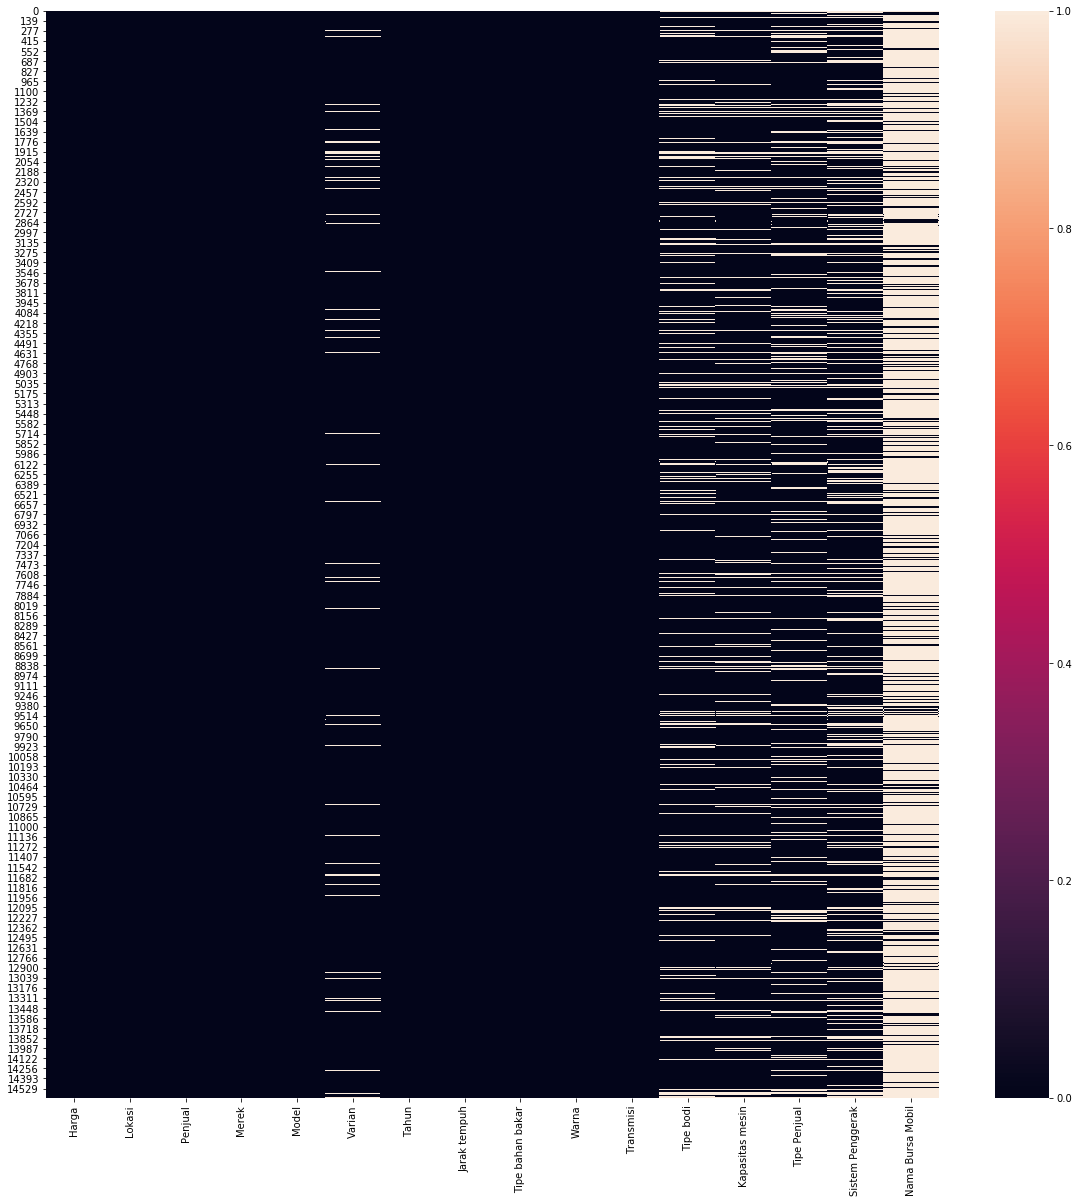

In [19]:
#untuk menvisualisasikan data yang akan diolah, sehingga bisa tau dimana saja letak NAnnya
plt.figure(figsize=(20,20))# untuk size
sns.heatmap(data.isna()) # untuk plot heatmap NaN
plt.show()
# plt.savefig('handling missing.png') # untuk mensave hasil plot

- Dapat dilihat dari hasil visualisasi data yang ada pada dasaset olx, pada kolom nama bursa mobil, terdapat banyak null, namun karena pada
riset ini tidak memerlukan kolom tersebut, maka akan dilakukan drop


In [20]:
#drop kolom Nama Bursa Mobil

data = data.drop(['Nama Bursa Mobil'],axis=1)
data.head()

,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak
0,155000792,"Ngaliyan, Semarang Kota, Jawa Tengah",Tegar Ranisdya,BMW,Serie 3,320i Business Edition,2006,85.000-90.000 km,Bensin,Hitam,Automatic,Sedan,>1.500 - 2.000 cc,Individu,NaN
1,56000000,"Medan Johor, Medan Kota, Sumatra Utara",Anda Syahwilhanto,Hyundai,Getz,Lain-lain,2005,0-5.000 km,Bensin,Biru,Manual,Hatchback,>1.000 - 1.500 cc,Individu,Front Wheel Drive (FWD)
2,120000000,"Ilir Timur I, Palembang Kota, Sumatra Selatan",alvianistm,Isuzu,Grand touring,Lain-lain,2004,10.000-15.000 km,Diesel,Silver,Manual,NaN,NaN,Individu,NaN
3,169000000,"Balerejo, Madiun Kab., Jawa Timur",PUSAT MOBIL BEKAS SIDOARJO,Isuzu,Grand touring,Lain-lain,2010,100.000-105.000 km,Diesel,Coklat,Manual,Minibus,>2.000 - 3.000 cc,Diler,NaN
5,190000000,"Tegalsari, Surabaya Kota, Jawa Timur",SUZUKI DEALER JAWA TIMUR,Suzuki,Ertiga,NaN,2019,0-5.000 km,Bensin,Lainnya,Manual,NaN,NaN,NaN,NaN


## 5. Outliers keseluruhan

In [21]:
### Outlier Harga keseluruhan Mobil
Q3 = data.describe()['Harga']['75%']
# print(Q3)
Q1 = data.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = data[(data['Harga'] < lf) | (data['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False)
Outliers.sort_values(by='Harga', ascending=False).head(10)

Jumlah Outliers 1757


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak
12342,14000000000,"Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.",european cars,Ferrari,812,NaN,2019,0-5.000 km,Bensin,Merah,Automatic,NaN,NaN,NaN,NaN
8170,11750000000,"Karawaci, Tangerang Kota, Banten",GARASI MOBILKU,Mobil CBU,Mobil CBU Lainnya,Lain-lain,2019,0-5.000 km,Bensin,Hitam,Automatic,Sports & Super Car,>3.000 cc,NaN,Rear Wheel Drive (RWD)
5828,11000000000,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",beduridwan,Aston Martin,DB11,V12,2019,0-5.000 km,Bensin,Abu-abu,Automatic Triptonic,Coupe,>3.000 cc,Diler,Front Wheel Drive (FWD)
12428,11000000000,"Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.",Indonesia,Ferrari,488,Spider,2019,0-5.000 km,Bensin,Merah,Automatic,NaN,>3.000 cc,NaN,NaN
11093,11000000000,"Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.",TDA Luxury Toys,Ferrari,488,Spider,2019,0-5.000 km,Bensin,Merah,Automatic Triptonic,NaN,>3.000 cc,Diler,NaN
1434,10000000000,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",LydiaOktalina,Lamborghini,Aventador,NaN,2019,0-5.000 km,Bensin,Kuning,Automatic,NaN,NaN,NaN,NaN
5160,9000000000,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",beduridwan,Mobil CBU,Mobil CBU Lainnya,Lain-lain,2019,0-5.000 km,Bensin,Abu-abu,Automatic Triptonic,Coupe,>3.000 cc,Diler,Front Wheel Drive (FWD)
10830,8500000000,"Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.",AMBAR,Ferrari,F430,Lain-lain,2008,0-5.000 km,Bensin,Merah,Automatic Triptonic,NaN,NaN,Individu,NaN
4402,8500000000,"Pamulang, Tangerang Selatan Kota, Banten",Gilang Gemilang,Roll-Royce,Phantom,Lain-lain,2012,5.000-10.000 km,Bensin,Hitam,Automatic,Sports & Super Car,>3.000 cc,Individu,Rear Wheel Drive (RWD)
1209,7900000000,"Kebayoran Baru, Jakarta Selatan, Jakarta D.K.I.",TDA Luxury Toys,Aston Martin,DB11,Lain-lain,2018,0-5.000 km,Bensin,Merah,Automatic,Coupe,NaN,Diler,NaN


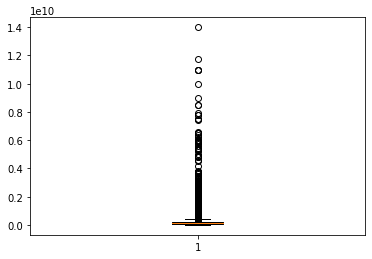

In [22]:
plt.boxplot(data['Harga'])
plt.show()

### 6. EDA

#### a.Tipe Mobil

In [23]:
#Tipe Mobil yang paling banyak dijual
mt= pd.crosstab(index=data['Tipe bodi'], columns= 'Jumlah')
top_bentuk =mt.sort_values(by='Jumlah', ascending=False)
top_bentuk.reset_index(inplace= True)
# df.rename(columns={"A": "a", "B": "c"})
top_bentuk.rename(columns={'Tipe bodi':'tipe_bodi'}, inplace=True)
top_bentuk

col_0,tipe_bodi,Jumlah
0,Sedan,2374
1,Minibus,1819
2,SUV,1775
3,MPV,1672
4,Hatchback,1232
5,Compact & City Car,1028
6,Jeep,779
7,Pick-up,318
8,Double Cabin,191
9,Coupe,156


- Dari hasil tersebut bentuk mobil yang diminati adalah Sedan

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

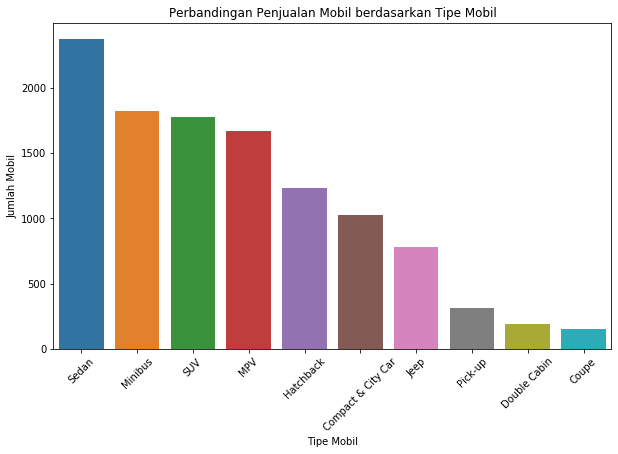

In [24]:
plt.figure(figsize=(10,6))
plt.title('Perbandingan Penjualan Mobil berdasarkan Tipe Mobil')
sns.barplot(top_bentuk.tipe_bodi.head(10),top_bentuk.Jumlah.head(10),estimator=sum)
plt.xlabel('Tipe Mobil')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### b. Merk Mobil

In [25]:
#Categori merk yang paling banyak dijual
mt= pd.crosstab(index=data['Merek'], columns= 'Jumlah')
top_merk =mt.sort_values(by='Jumlah', ascending=False)
top_merk.reset_index(inplace= True)
top_merk.head(10)

col_0,Merek,Jumlah
0,Honda,970
1,Daihatsu,963
2,Suzuki,954
3,Toyota,949
4,Mazda,934
5,Nissan,933
6,BMW,921
7,Mitsubishi,909
8,Mercedes-Benz,900
9,Chevrolet,719


- Dapat dilihat dari data tersebut, Merk mobil yang paling diminati adalah Honda

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

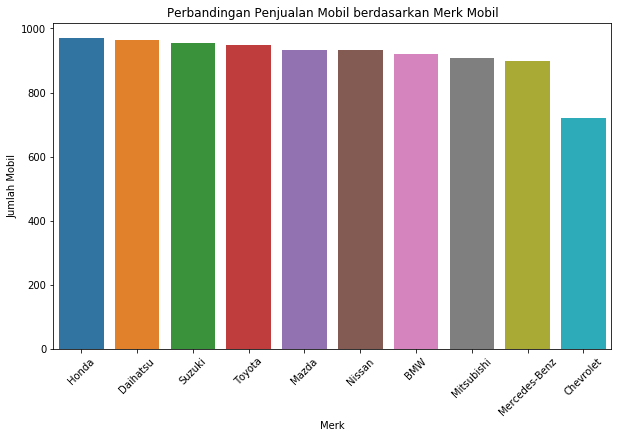

In [26]:
plt.figure(figsize=(10,6))
plt.title('Perbandingan Penjualan Mobil berdasarkan Merk Mobil')
sns.barplot(top_merk.Merek.head(10),top_merk.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### C. Jenis Mobil

Untuk analisis jenis mobil akan di ambil berdasarkan tipe Mobil, namun batasan tipe mobil yang akan dianalisis hanya tipe mobil yang dijual diatas 1000, yaitu :
1. sedan 2374
2. Minibus 1819
3. SUV 1775
4. MPV 1672
5. Hatchback 1232
6. Compact & City Car 1028

#### C.1 Sedan

In [27]:
sedan = data[data['Tipe bodi']=='Sedan']
sdn= pd.crosstab(index=[sedan['Model'],sedan['Merek']], columns= 'Jumlah')
top_sedan =sdn.sort_values(by='Jumlah', ascending=False)
top_sedan.reset_index(inplace= True)
top_sedan.head(10)

col_0,Model,Merek,Jumlah
0,Serie 3,BMW,415
1,C-Class,Mercedes-Benz,218
2,E-Class,Mercedes-Benz,202
3,Serie 5,BMW,131
4,S-Class,Mercedes-Benz,66
5,DOHC,Timor,53
6,Avega,Hyundai,48
7,Civic,Honda,42
8,City,Honda,35
9,Accord,Honda,34


Berdasarkan data tersebut, sedan yang paling banyak dijual adalah BMW Type Serie 3

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

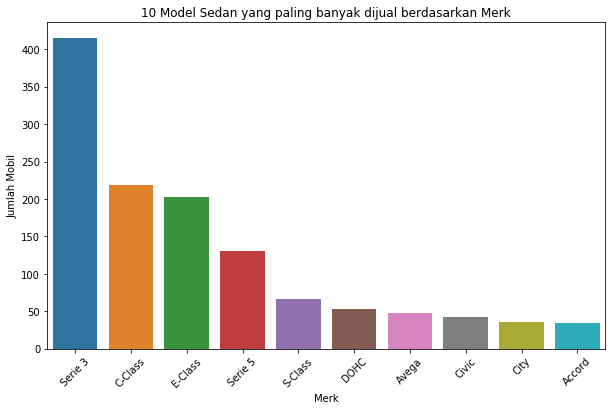

In [105]:

plt.figure(figsize=(10,6))
plt.title('10 Model Sedan yang paling banyak dijual berdasarkan Merk')
sns.barplot(top_sedan.Model.head(10),top_sedan.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### C.2 Minibus

In [29]:
minibus = data[data['Tipe bodi']=='Minibus']
mnbus= pd.crosstab(index=[minibus['Model'],minibus['Merek']], columns= 'Jumlah')
top_minibus =mnbus.sort_values(by='Jumlah', ascending=False)
top_minibus.reset_index(inplace= True)
top_minibus.head(10)

col_0,Model,Merek,Jumlah
0,Panther,Isuzu,187
1,Xenia,Daihatsu,105
2,Ertiga,Suzuki,84
3,Avanza,Toyota,77
4,Go+,Datsun,71
5,Innova,Toyota,71
6,Grand livina,Nissan,71
7,Spin,Chevrolet,51
8,Elf Minibus,Isuzu,40
9,Gran max,Daihatsu,38


Berdasarkan data tersebut, Minibus yang paling banyak dijual adalah Isuzu Panther

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

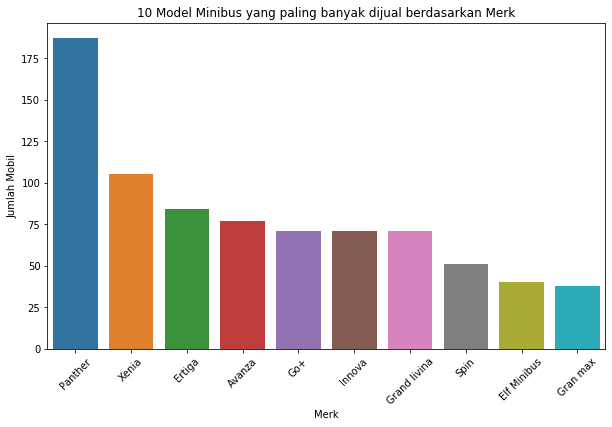

In [106]:
plt.figure(figsize=(10,6))
plt.title('10 Model Minibus yang paling banyak dijual berdasarkan Merk')
sns.barplot(top_minibus.Model.head(10),top_minibus.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### C.3 SUV

In [31]:
suv = data[data['Tipe bodi']=='SUV']
suvv= pd.crosstab(index=[suv['Model'],suv['Merek']], columns= 'Jumlah')
top_suv =suvv.sort_values(by='Jumlah', ascending=False)
top_suv.reset_index(inplace= True)
top_suv.head(10)

col_0,Model,Merek,Jumlah
0,CX-5,Mazda,156
1,Captiva,Chevrolet,148
2,Pajero Sport,Mitsubishi,135
3,X-Trail,Nissan,94
4,CR-V,Honda,71
5,Terios,Daihatsu,56
6,RX,Lexus,48
7,Ecosport,Ford,45
8,HR-V,Honda,41
9,Santa Fe,Hyundai,38


Berdasarkan data tersebut, SUV yang paling banyak dijual adalah Mazda CX-5

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

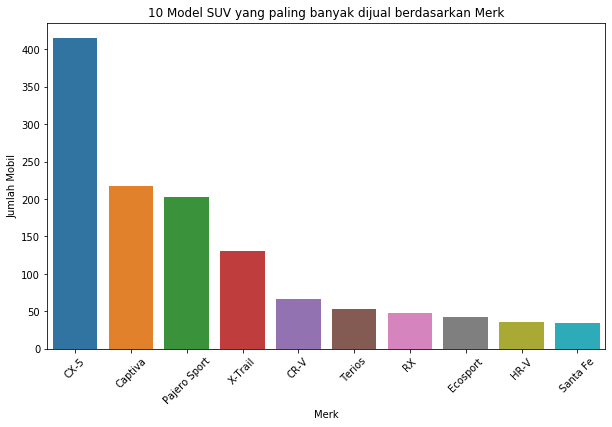

In [107]:
plt.figure(figsize=(10,6))
plt.title('10 Model SUV yang paling banyak dijual berdasarkan Merk')
sns.barplot(top_suv.Model.head(10),top_sedan.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### C.4 MPV

In [33]:
mpv = data[data['Tipe bodi']=='MPV']
mpv= pd.crosstab(index=[mpv['Model'],mpv['Merek']], columns= 'Jumlah')
top_mpv =mpv.sort_values(by='Jumlah', ascending=False)
top_mpv.reset_index(inplace= True)
top_mpv.head(10)

col_0,Model,Merek,Jumlah
0,Grand livina,Nissan,141
1,Ertiga,Suzuki,119
2,Xenia,Daihatsu,108
3,Spin,Chevrolet,99
4,Panther,Isuzu,92
5,Avanza,Toyota,88
6,Biante,Mazda,68
7,Mobilio,Honda,62
8,Go+,Datsun,61
9,Innova,Toyota,60


Jenis Mobil MPV yang paling diminati adalah Grand Livina

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

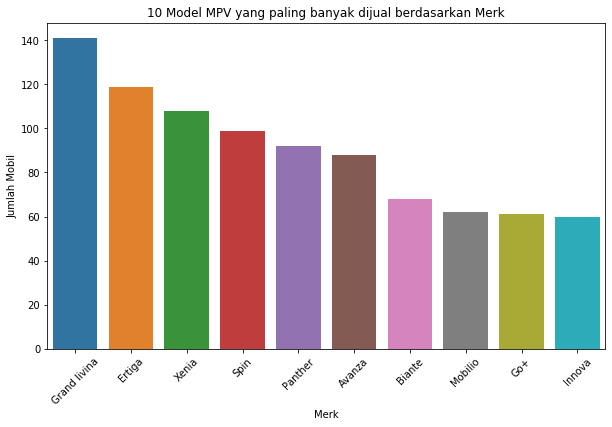

In [108]:
plt.figure(figsize=(10,6))
plt.title('10 Model MPV yang paling banyak dijual berdasarkan Merk')
sns.barplot(top_mpv.Model.head(10),top_mpv.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### C5. Hatchback

In [35]:
hatcback = data[data['Tipe bodi']=='Hatchback']
hatcback= pd.crosstab(index=[hatcback['Model'],hatcback['Merek']], columns= 'Jumlah')
top_hat =hatcback.sort_values(by='Jumlah', ascending=False)
top_hat.reset_index(inplace= True)
top_hat.head(10)

col_0,Model,Merek,Jumlah
0,2,Mazda,191
1,Fiesta,Ford,99
2,Picanto,KIA,73
3,Jazz,Honda,64
4,Rio,KIA,56
5,Go,Datsun,40
6,Aveo,Chevrolet,37
7,Golf,Volkswagen,35
8,March,Nissan,32
9,Brio,Honda,31


Mobil Hatchback yang paling diminati adalah Mazda 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

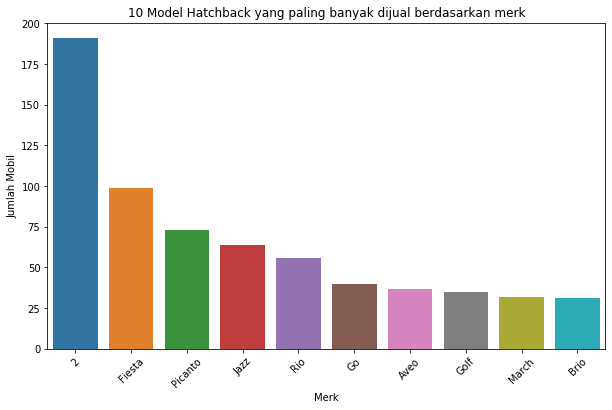

In [109]:
plt.figure(figsize=(10,6))
plt.title('10 Model Hatchback yang paling banyak dijual berdasarkan merk')
sns.barplot(top_hat.Model.head(10),top_hat.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### C6. Compact & City Car

In [37]:
city = data[data['Tipe bodi']=='Compact & City Car']
city= pd.crosstab(index=[city['Model'],city['Merek']], columns= 'Jumlah')
top_city =city.sort_values(by='Jumlah', ascending=False)
top_city.reset_index(inplace= True)
top_city.head(10)

col_0,Model,Merek,Jumlah
0,Picanto,KIA,120
1,Ayla,Daihatsu,62
2,Brio,Honda,62
3,2,Mazda,50
4,Jazz,Honda,48
5,Go+,Datsun,46
6,March,Nissan,37
7,Atoz,Hyundai,36
8,Go,Datsun,36
9,Visto,KIA,31


Mobil jenis Compact & City Car yang paling diminati adalah Picanto

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

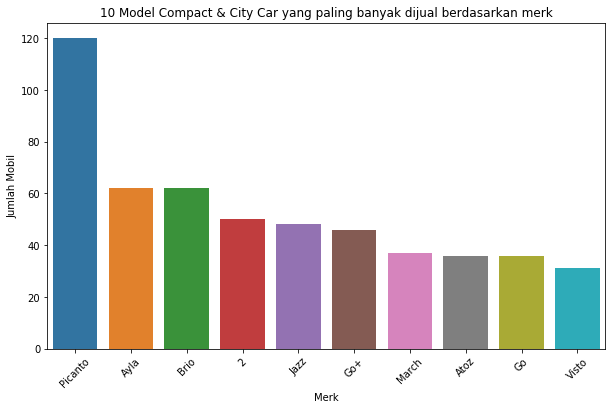

In [110]:
plt.figure(figsize=(10,6))
plt.title('10 Model Compact & City Car yang paling banyak dijual berdasarkan merk')
sns.barplot(top_city.Model.head(10),top_city.Jumlah.head(10),estimator=sum)
plt.xlabel('Merk')
plt.ylabel('Jumlah Mobil')
plt.xticks(rotation=45)

#### D. Harga Mobil
pada bagian ini karena jenis dan tipe mobil cukup banyak, yang akan ditampilkan adalah top model mobil disetiap tipe bodi mobil

#### D.1 BMW Series E3

In [79]:
desk_sdn = top_sdn.describe().T
print(desk_sdn['mean'])
print('Harga paling murah',top_sdn[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga').head(1))
print('Harga paling mahal',top_sdn[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga',ascending=False).head(1))

Harga   222987327.617
Name: mean, dtype: float64
Harga paling murah      Merek     Harga        Varian Tahun Transmisi
4542   BMW  22000000  318i E30 1.8  1989    Manual
Harga paling mahal      Merek      Harga            Varian Tahun            Transmisi
4982   BMW  800000000  330i 2.0 M Sport  2017  Automatic Triptonic


In [83]:
### Outlier Harga  Mobil BMW
Q3 = top_sdn.describe()['Harga']['75%']
# print(Q3)
Q1 = top_sdn.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = top_sdn[(top_sdn['Harga'] < lf) | (top_sdn['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False)


Jumlah Outliers 0


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak


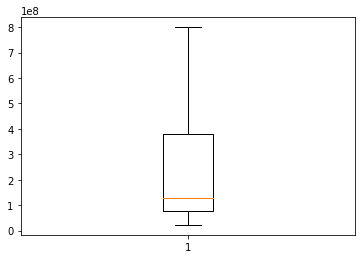

In [80]:
plt.boxplot(top_sdn['Harga'])
plt.show()

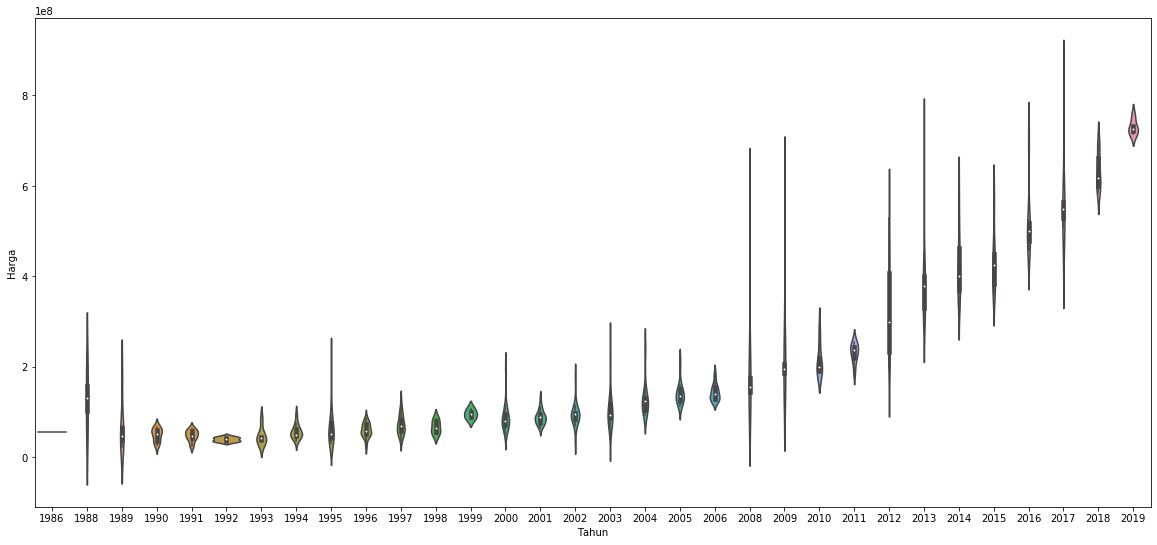

In [46]:
plt.figure(figsize=(20,9))
sns.violinplot(x = 'Tahun', y = 'Harga',data = top_sdn)

#### D2. Panther

In [81]:
top_panther = data[data['Model']=='Panther']
# top_panther.describe()
desk_pan = top_panther.describe().T
print(desk_pan['mean'])
print('Harga paling murah',top_panther[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga').head(1))
print('Harga paling mahal',top_panther[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga',ascending=False).head(1))

Harga   83672692.650
Name: mean, dtype: float64
Harga paling murah        Merek     Harga Varian Tahun Transmisi
10598  Isuzu  28000000    2.3  1991    Manual
Harga paling mahal       Merek      Harga         Varian Tahun Transmisi
7505  Isuzu  260000000  Grand Touring  2016    Manual


In [84]:
### Outlier Harga  Mobil Panther
Q3 = top_panther.describe()['Harga']['75%']
# print(Q3)
Q1 = top_panther.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = top_panther[(top_panther['Harga'] < lf) | (top_panther['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False)

Jumlah Outliers 5


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak
7505,260000000,"Gresik, Gresik Kab., Jawa Timur",Rerry Ediningtyas,Isuzu,Panther,Grand Touring,2016,55.000-60.000 km,Diesel,Putih,Manual,MPV,>3.000 cc,Individu,Front Wheel Drive (FWD)
1680,230000000,"Medan Kota, Medan Kota, Sumatra Utara",halim,Isuzu,Panther,Grand Touring,2014,75.000-80.000 km,Diesel,Hitam,Manual,Minibus,>2.000 - 3.000 cc,Diler,Rear Wheel Drive (RWD)
9086,230000000,"Bubutan, Surabaya Kota, Jawa Timur",ADONAI MOBIL JUAL BELI MOBIL BEKAS BERKWALITAS,Isuzu,Panther,LS,2016,70.000-75.000 km,Diesel,Hitam,Manual,Minibus,>2.000 - 3.000 cc,Diler,NaN
5947,195000000,"Ciracas, Jakarta Timur, Jakarta D.K.I.",Gery Surjaudaja,Isuzu,Panther,Grand Touring,2012,115.000-120.000 km,Diesel,Hitam,Manual,Minibus,>2.000 - 3.000 cc,Individu,4X2
531,190000000,"Medan Petisah, Medan Kota, Sumatra Utara",Graha Putra Mobil,Isuzu,Panther,LV,2016,35.000-40.000 km,Diesel,Hitam,Manual,MPV,NaN,Diler,4X2


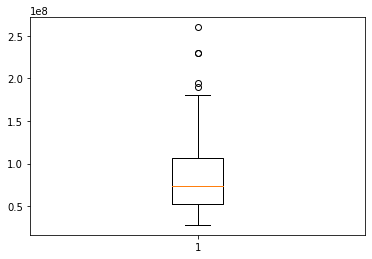

In [85]:
plt.boxplot(top_panther['Harga'])
plt.show()

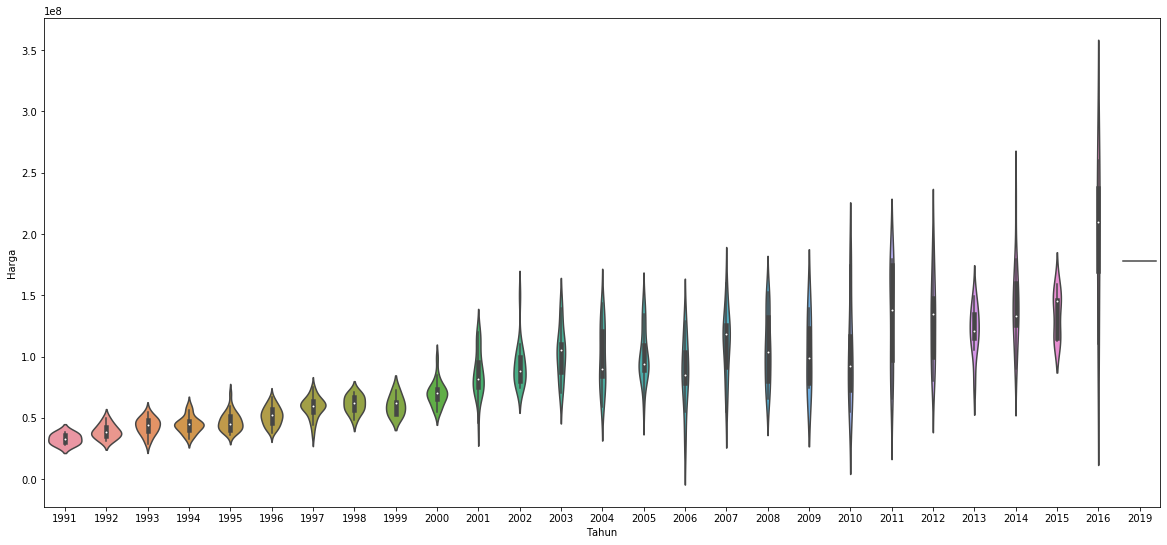

In [49]:
plt.figure(figsize=(20,9))
sns.violinplot(x = 'Tahun', y = 'Harga',data = top_panther)

#### D3. CX5 Mazda

In [82]:
top_cx5 = data[data['Model']=='CX-5']
top_cx5.describe()
desk_cx5 = top_cx5.describe().T
print(desk_cx5['mean'])
print('Harga paling murah',top_cx5[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga').head(1))
print('Harga paling mahal',top_cx5[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga',ascending=False).head(1))

Harga   269121617.319
Name: mean, dtype: float64
Harga paling murah      Merek      Harga   Varian Tahun            Transmisi
670  Mazda  175000000  Touring  2012  Automatic Triptonic
Harga paling mahal       Merek      Harga Varian Tahun            Transmisi
7038  Mazda  537000000  Elite  2019  Automatic Triptonic


In [89]:
### Outlier Harga  Mobil Mazda
Q3 = top_cx5.describe()['Harga']['75%']
# print(Q3)
Q1 = top_cx5.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = top_cx5[(top_cx5['Harga'] < lf) | (top_cx5['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False).head()

Jumlah Outliers 18


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak
7038,537000000,"Serpong Utara, Tangerang Selatan Kota, Banten",joe,Mazda,CX-5,Elite,2019,0-5.000 km,Bensin,Hitam,Automatic Triptonic,SUV,>2.000 - 3.000 cc,Individu,4X2
9043,535000000,"Serpong Utara, Tangerang Selatan Kota, Banten",joe,Mazda,CX-5,Elite,2019,0-5.000 km,Bensin,Putih,Automatic Triptonic,SUV,>2.000 - 3.000 cc,Individu,4X2
5447,531000000,"Karang Tengah, Tangerang Kota, Banten",rochman jakarta barat,Mazda,CX-5,Elite,2019,0-5.000 km,Bensin,Putih,Automatic,SUV,>2.000 - 3.000 cc,Individu,4X2
13064,530000000,"Cengkareng, Jakarta Barat, Jakarta D.K.I.",shohib mazda,Mazda,CX-5,Elite,2019,0-5.000 km,Bensin,Hitam,Automatic Triptonic,SUV,>2.000 - 3.000 cc,Individu,Front Wheel Drive (FWD)
11336,505000000,"Waru, Sidoarjo Kab., Jawa Timur",Barata Jaya Putera Anugerah,Mazda,CX-5,Elite,2019,5.000-10.000 km,Bensin,Hitam,Automatic,SUV,>2.000 - 3.000 cc,Diler,Front Wheel Drive (FWD)


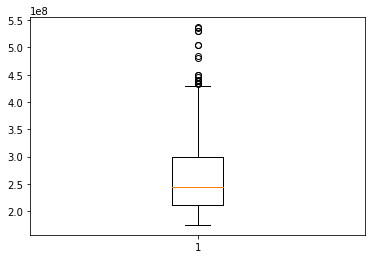

In [87]:
plt.boxplot(top_cx5['Harga'])
plt.show()

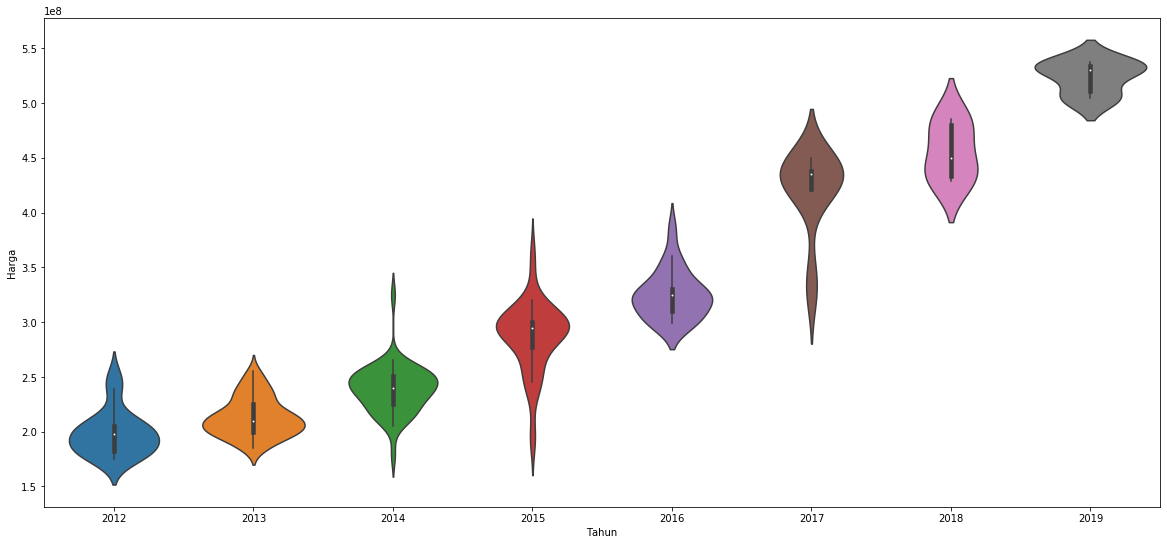

In [52]:
plt.figure(figsize=(20,9))
sns.violinplot(x = 'Tahun', y = 'Harga',data = top_cx5)

#### D4. Grand Livina

In [93]:
top_gl = data[data['Model']=='Grand livina']
top_gl.describe()

desk_gl = top_gl.describe().T
print(desk_gl['mean'])
print('Harga paling murah',top_gl[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga').head(1))
print('Harga paling mahal',top_gl[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga',ascending=False).head(1))

Harga   104683892.879
Name: mean, dtype: float64
Harga paling murah        Merek     Harga     Varian Tahun Transmisi
6917  Nissan  59000000  Lain-lain  2008    Manual
Harga paling mahal         Merek      Harga     Varian Tahun  Transmisi
12474  Nissan  160000000  Lain-lain  2016  Automatic


In [94]:
### Outlier Harga  Mobil Grand Livina
Q3 = top_gl.describe()['Harga']['75%']
# print(Q3)
Q1 = top_gl.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = top_gl[(top_gl['Harga'] < lf) | (top_gl['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False).head()

Jumlah Outliers 0


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak


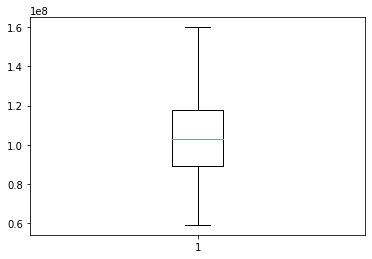

In [96]:
plt.boxplot(top_gl['Harga'])
plt.show()

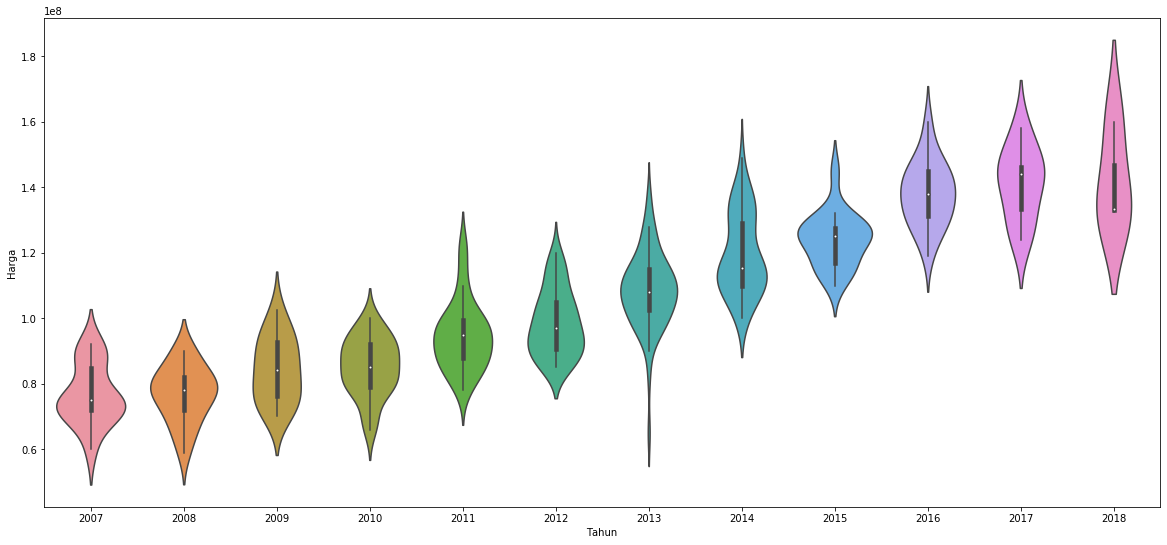

In [95]:
plt.figure(figsize=(20,9))
sns.violinplot(x = 'Tahun', y = 'Harga',data = top_gl)

#### D5. Mazda 2

In [99]:
top_2 = data[data['Model']=='2']
desk_2 = top_2.describe().T
print(desk_2['mean'])
print('Harga paling murah',top_2[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga').head(1))
print('Harga paling mahal',top_2[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga',ascending=False).head(1))

Harga   142021918.934
Name: mean, dtype: float64
Harga paling murah        Merek     Harga Varian Tahun Transmisi
10467  Mazda  65000000      R  2009    Manual
Harga paling mahal        Merek      Harga Varian Tahun            Transmisi
12046  Mazda  332600000     GT  2019  Automatic Triptonic


In [100]:
### Outlier Harga  Mobil Mazda 2
Q3 = top_2.describe()['Harga']['75%']
# print(Q3)
Q1 = top_2.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = top_2[(top_2['Harga'] < lf) | (top_2['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False).head()

Jumlah Outliers 1


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak
12046,332600000,"Serpong Utara, Tangerang Selatan Kota, Banten",joe,Mazda,2,GT,2019,0-5.000 km,Bensin,Abu-abu,Automatic Triptonic,Hatchback,>1.000 - 1.500 cc,Individu,4X2


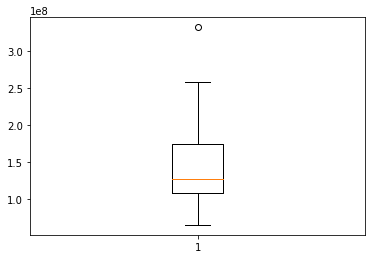

In [98]:
plt.boxplot(top_2['Harga'])
plt.show()

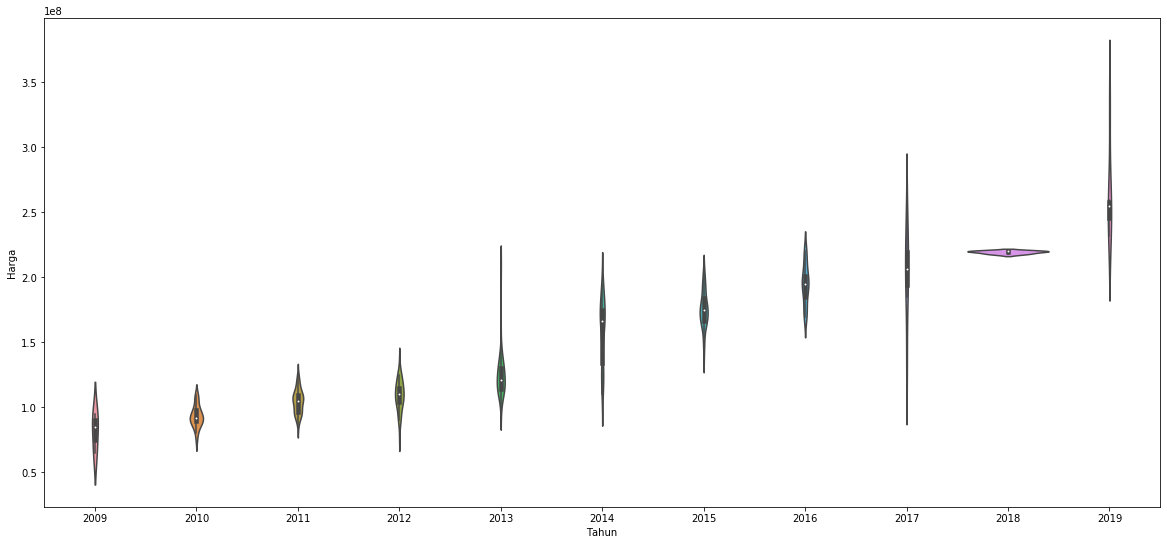

In [57]:
plt.figure(figsize=(20,9))
sns.violinplot(x = 'Tahun', y = 'Harga',data = top_2)

#### D6. Picanto

In [102]:
top_picanto = data[data['Model']=='Picanto']
desk_picanto = top_picanto.describe().T
print(desk_picanto['mean'])
print('Harga paling murah',top_picanto[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga').head(1))
print('Harga paling mahal',top_picanto[['Merek','Harga','Varian','Tahun','Transmisi']].sort_values(by='Harga',ascending=False).head(1))

Harga   76449822.695
Name: mean, dtype: float64
Harga paling murah       Merek     Harga Varian Tahun  Transmisi
10668   KIA  40000000    A/T  2005  Automatic
Harga paling mahal      Merek      Harga Varian Tahun Transmisi
5649   KIA  115000000    M/T  2017    Manual


In [101]:
### Outlier Harga  Mobil Picanto
Q3 = top_picanto.describe()['Harga']['75%']
# print(Q3)
Q1 = top_picanto.describe()['Harga']['25%']
# print(Q1)
IQR = Q3-Q1
# print(IQR)
uf = Q3 + (1.5*IQR)
lf = Q1 - (1.5*IQR)
# print(uf)
# print(lf)
Outliers = top_picanto[(top_picanto['Harga'] < lf) | (top_picanto['Harga'] > uf)]
print(f'Jumlah Outliers {len(Outliers)}')
Outliers.sort_values(by='Harga', ascending=False).head()

Jumlah Outliers 3


,Harga,Lokasi,Penjual,Merek,Model,Varian,Tahun,Jarak tempuh,Tipe bahan bakar,Warna,Transmisi,Tipe bodi,Kapasitas mesin,Tipe Penjual,Sistem Penggerak
4923,115000000,"Duren Sawit, Jakarta Timur, Jakarta D.K.I.",O813 satu satu 43 55 dua empat,KIA,Picanto,1.2 NA,2017,5.000-10.000 km,Bensin,Merah,Manual,Minibus,>1.000 - 1.500 cc,Diler,4X2
5649,115000000,"Duren Sawit, Jakarta Timur, Jakarta D.K.I.",O8 I2 2dua I2 I empat dua enam,KIA,Picanto,M/T,2017,5.000-10.000 km,Bensin,Merah,Manual,NaN,<1.000 cc,Diler,NaN
12862,114000000,"Denpasar Selatan, Denpasar Kota, Bali",S A C Rasendria,KIA,Picanto,A/T Option,2014,40.000-45.000 km,Bensin,Putih,Automatic,Sedan,>1.000 - 1.500 cc,Individu,4X2


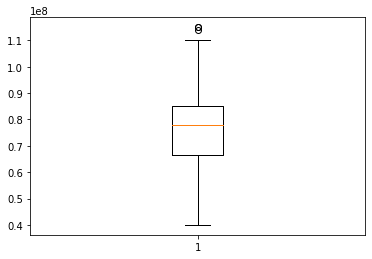

In [97]:
plt.boxplot(top_picanto['Harga'])
plt.show()

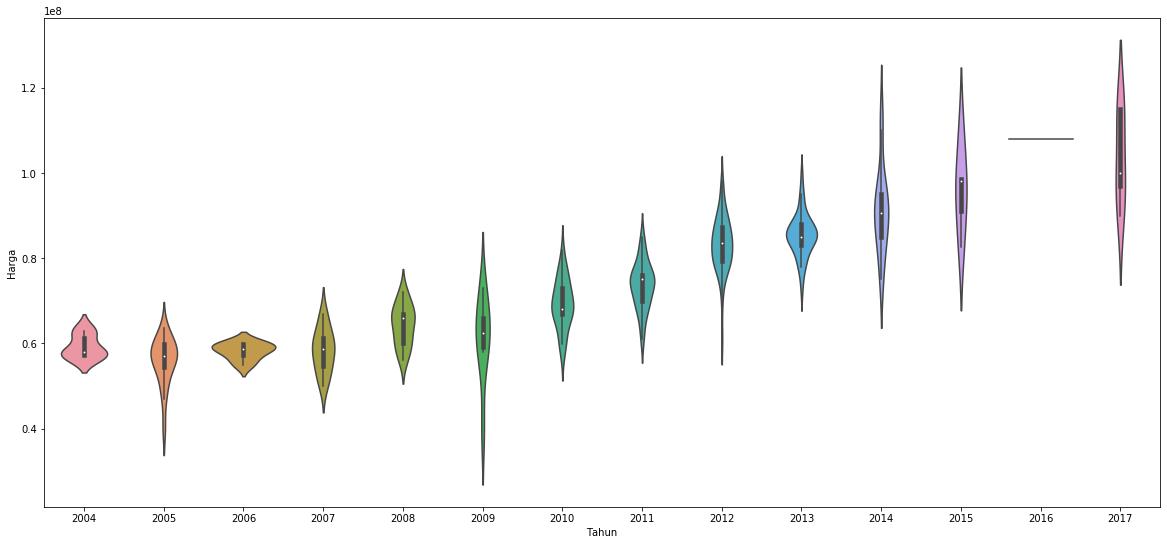

In [60]:
plt.figure(figsize=(20,9))
sns.violinplot(x = 'Tahun', y = 'Harga',data = top_picanto)

#### 7. Rangkuman

Dari hasil riset Tim Data Analysis ABC otomobil,dapat disimpulkan bahwa:
- Jenis mobil yang paling diminati di Indonesia adalah Sedan.
- Merk mobil yang paling digemari adalah Honda
- lalu berdasarkan 6 jenis mobil yang dipaling diminati di Indonesia, tim juga memberikan rangkuman singkat dari 6 model mobil masing-masing dari jenisnya yaitu :
    
    1. Mobil Sedan = BMW Series 3
       - Harga rata-rata Mobil tersebut adalah 222.987.328
       - Harga paling murahnya adalah 22.000.000 Tahun 1989  dengan Transmisi  Manual
       - Harga paling mahalnya adalah 800.000.000 Tahun 2017 dengan Transmisi Automatic Triptonic

    2. Mobil Minibus = Isuzu Panther
       - Harga rata-rata Mobil tersebut adalah 83.672.693
       - Harga paling murahnya adalah 28.000.000 Tahun 1991  dengan Transmisi  Manual
       - Harga paling mahalnya adalah 260.000.000 Tahun 2016 dengan Transmisi Manual
     
    3. Mobil SUV = CX-5
       - Harga rata-rata Mobil tersebut adalah 269.121.617
       - Harga paling murahnya adalah 175.000.000 Tahun 2012  dengan Transmisi  Automatic Triptonic
       - Harga paling mahalnya adalah 537.000.000 Tahun 2019 dengan Transmisi Automatic Triptonic

    4. Mobil MPV = Grand Livina
       - Harga rata-rata Mobil tersebut adalah 104.683.893
       - Harga paling murahnya adalah 59.000.000 Tahun 2008  dengan Transmisi  Manual
       - Harga paling mahalnya adalah 160.000.000 Tahun 2016 dengan Transmisi Automatic
       Harga   104683892.879

    5. Mobil Hatchback = Mazda 2  
       - Harga rata-rata Mobil tersebut adalah 142.021.919
       - Harga paling murahnya adalah 65.000.000 Tahun 2009  dengan Transmisi  Manual
       - Harga paling mahalnya adalah 332.600.000 Tahun 2019 dengan Transmisi Automatic Triptonic
      
    6. Mobil Picanto
       - Harga rata-rata Mobil tersebut adalah 76.449.823
       - Harga paling murahnya adalah 40.000.000 Tahun 2005  dengan Transmisi Automatic
       - Harga paling mahalnya adalah 115.000.000 Tahun 2017 dengan Transmisi Manual


#### Saran
Harapannya dengan kesimpulan yang telah kami buat, dapat membantu para penjual mobil bekas untuk menyiapkan merk atau tipe mobil sesuai dengan harga rata-rata yang kami tuliskan